In [1]:
!pip install qiskit[visualization]
!pip install qiskit-aer

In [2]:
from qiskit import QuantumRegister,ClassicalRegister,Aer,execute,QuantumCircuit
from qiskit.visualization import plot_histogram

<h3> Task 1 </h3>

Implement half adder circuit using qiskit

For A = 0 and B = 0


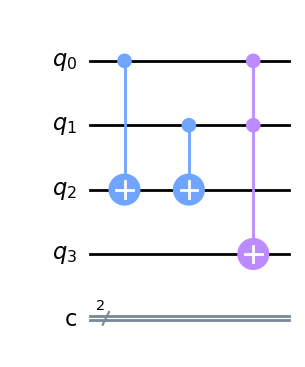

Sum = 0 and Carry = 0
For A = 0 and B = 1


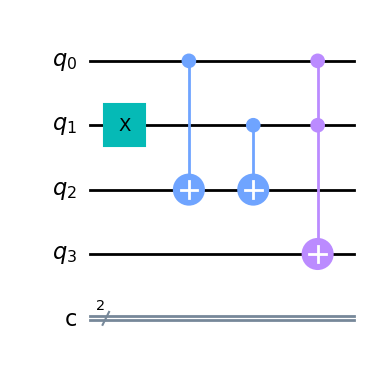

Sum = 1 and Carry = 0
For A = 1 and B = 0


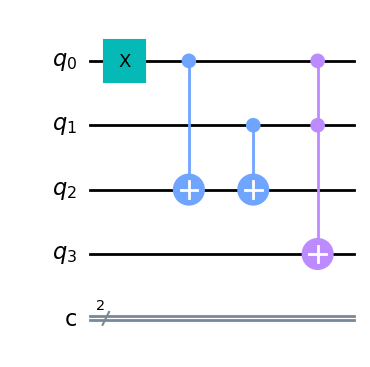

Sum = 1 and Carry = 0
For A = 1 and B = 1


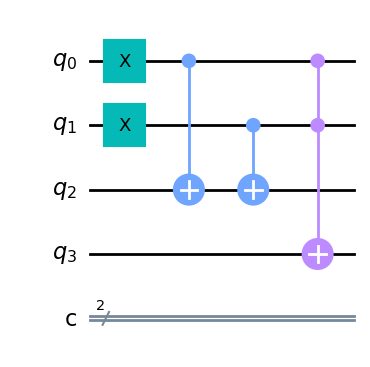

Sum = 0 and Carry = 1


In [12]:
# Sum = A xor B
# Carry = AB

combinations = ['00','01','10','11']
for i in combinations:
    qc = QuantumCircuit(4,2)
    if i[0]=='1':
        qc.x(0)
    if i[1]=='1':
        qc.x(1)
    qc.cx(0,2)
    qc.cx(1,2)
    qc.ccx(0,1,3)
    print(f'For A = {i[0]} and B = {i[1]}')
    display(qc.draw(output='mpl'))
    qc.measure([2,3],[1,0]) # as order is from right to left
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
    counts = job.result().get_counts(qc)
    result = list(counts.keys())
    print(f'Sum = {result[0][0]} and Carry = {result[0][1]}')

<h3> Task 2 </h3>

Generate |0+> state and check the code validity

In [15]:
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2,2)
qc.h(0)
ket = Statevector(qc)
ket.draw()


'Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [16]:
assert ket ==Statevector.from_label('0+')

<h3> Task 3 </h3>

Implement Superdense Coding

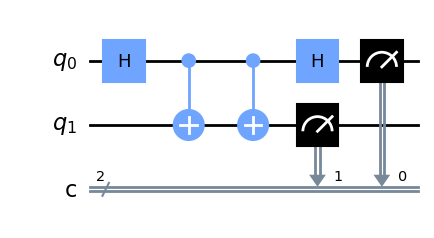

For Classical message = 00

Using quantum computer =  00


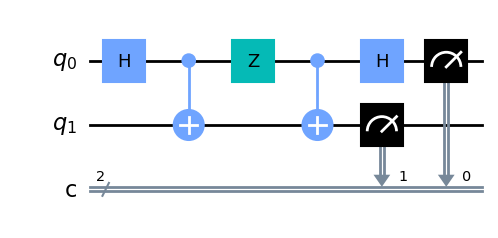

For Classical message = 01

Using quantum computer =  01


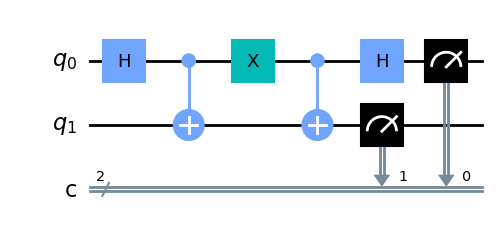

For Classical message = 10

Using quantum computer =  10


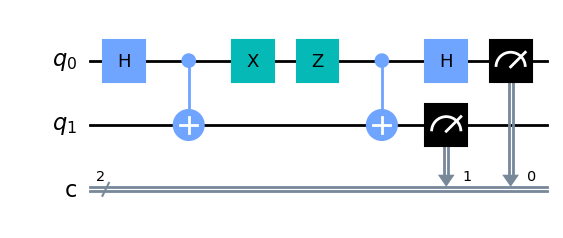

For Classical message = 11

Using quantum computer =  11


In [48]:
qc_3rd_party = QuantumCircuit(2,2)
qc_3rd_party.h(0)
qc_3rd_party.cx(0,1)

message_list = ['00','01','10','11']

qc_Alice = QuantumCircuit(2,2)

for msg in message_list:
    if msg[-2]=='1':
        qc_Alice.x(0)
    if msg[-1]=='1':
        qc_Alice.z(0)
    qc_Bob = QuantumCircuit(2,2)
    qc_Bob.cx(0,1)
    qc_Bob.h(0)
    qc_Bob.measure([0,1],[0,1])
    complete_qc = qc_3rd_party.compose(qc_Alice.compose(qc_Bob))
    display(complete_qc.draw(output='mpl'))
    job = execute(complete_qc,Aer.get_backend('qasm_simulator'),shots=1000)
    count = job.result().get_counts(complete_qc)
    print(f'For Classical message = {msg}\n')
    result = list(count.keys())
    print('Using quantum computer = ',result[0])
    qc_Alice.data=[]
    

<h3> Task 4 </h3>

Given a entanglement system below in In[3] cell, now do some measurement on them and describe what do you see .
In the system there are two qubits qc_Alice(order 1) and qc_Bob(order 0).

a) apply z measurement on both.


b) apply zx measurement on the qubits.


c) apply xz measurement on the qubits


d) apply xx measurement on the qubits.

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


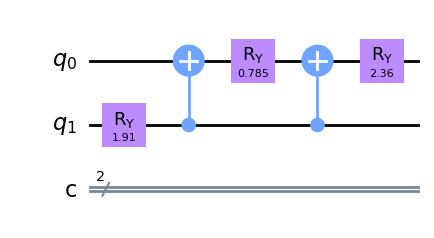

In [3]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.ry(1.911,1)
qc_charlie.cx(1,0)
qc_charlie.ry(0.785,0)
qc_charlie.cx(1,0)
qc_charlie.ry(2.356,0)
qc_charlie.draw(output='mpl')

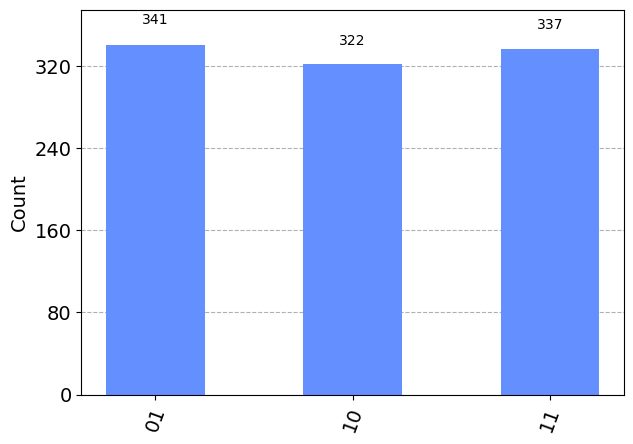

In [4]:
# doing z measurement

meas_z = QuantumCircuit(2,2)
meas_z.measure([0,1],[0,1])
complete_qc = qc_charlie.compose(meas_z)
job = execute(complete_qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(complete_qc)
plot_histogram(counts)

From this we can see that the both qubits are never 0 for z measurement.

here we can see when do zz measuremen 00 never occurs

In [7]:

# Alice z and Bob x measurement
meas_zx = QuantumCircuit(2,2)
meas_zx.h(0)
meas_zx.measure([0,1],[0,1])


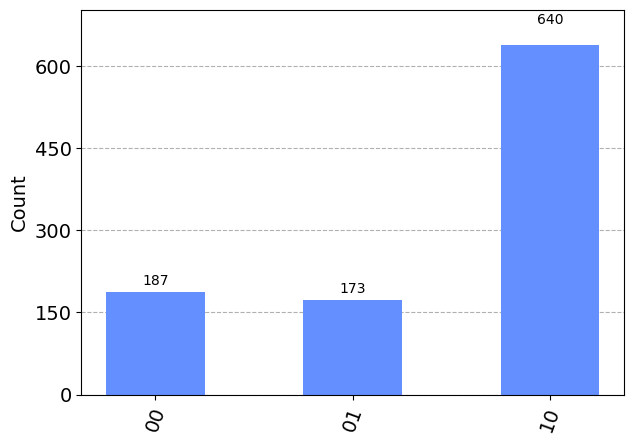

In [8]:
complete_qc = qc_charlie.compose(meas_zx)
job = execute(complete_qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts()
plot_histogram(counts)

In this case both qubits are never 1. 

Here we can see if done a x measurement on a qubit and z measurement on another we never get 11

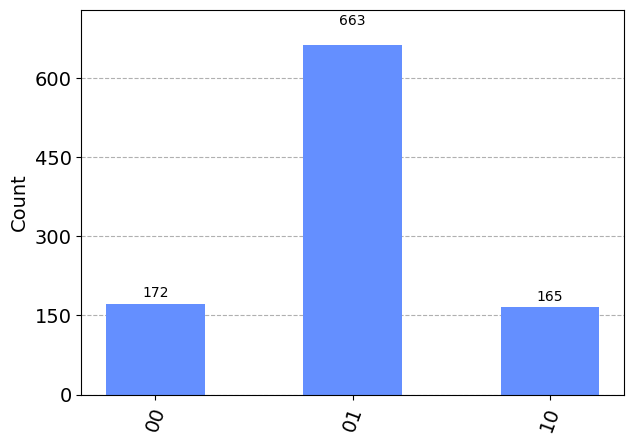

In [9]:
# Alice x and Bob z measurement
meas_xz = QuantumCircuit(2,2)
meas_xz.h(1)
meas_xz.measure([0,1],[0,1])
complete_qc = qc_charlie.compose(meas_xz)
job = execute(complete_qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(complete_qc)
plot_histogram(counts)

From above three measurements we can infer that,

1) If z measurement are made on both qubits, they never both output 0.

2) If an x measurement of one qubit outputs 1, a z measurement of the other will output 0

We can now analyse the case where both Alice and Bob make an x measurement , and they both get the result 1. Bob would then be able to apply observation 2 and infer that Alice would certainly have gotten a 0, if she had instead done a z measurement.Alice can do the sae , inferring that Bob would have gotten a 0 if he had made a z measurement .So together they conclude that, if they had both made z measurement they would both have gotten the output 0.Since observation 1 shows us that such a result would be impossible , Alice and Bob could predict that the 11 result will occur never

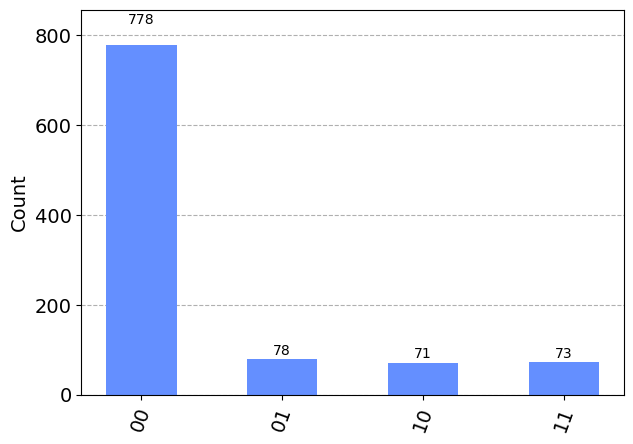

In [10]:
# Alice and Bob both perform x measurement

meas_xx=QuantumCircuit(2,2)
meas_xx.h([0,1])
meas_xx.measure([0,1],[0,1])
complete_qc = qc_charlie.compose(meas_xx)
job = execute(complete_qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(complete_qc)
plot_histogram(counts)

Here 11 result is not likely, but it's certainly not impossible.

It only means that qubits are more random than classical variables , it is not always a negative quality.It also means that restrictions applied to classical variables do not always apply to qubits,and that quantum correlations can have properties that would be impossible classically.These unique correlations are one of the signature properties of entangled states.

In [3]:
from qiskit import transpile,assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector,plot_histogram

<h3> Task 5 </h3>

Output |1> state in bloch sphere

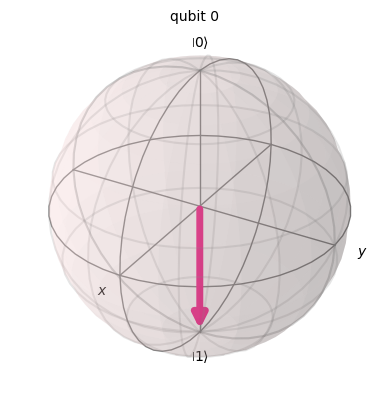

In [5]:
def lab1_ex1():
    qc = QuantumCircuit(1)
    qc.x(0)
    return qc
state = Statevector.from_instruction(lab1_ex1())
plot_bloch_multivector(state)

<h3> Task 6 </h3>

Now create |+> and |-> state and visualize it in blochsphere

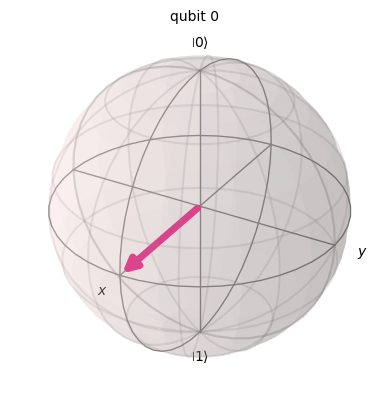

In [7]:
def lab1_exp2():
    qc = QuantumCircuit(1)
    qc.h(0)
    return qc
state = Statevector.from_instruction(lab1_exp2())
plot_bloch_multivector(state)

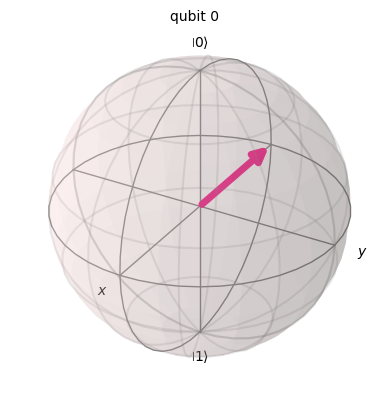

In [8]:
def lab1_exp3():
    qc = QuantumCircuit(1)
    qc.x(0)
    qc.h(0)
    return qc
state = Statevector.from_instruction(lab1_exp3())
plot_bloch_multivector(state)

we could do qc.h(0) and then qc.z(0) also here

<h3> Task 7 </h3>

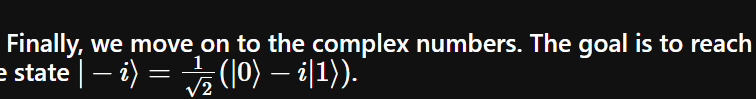

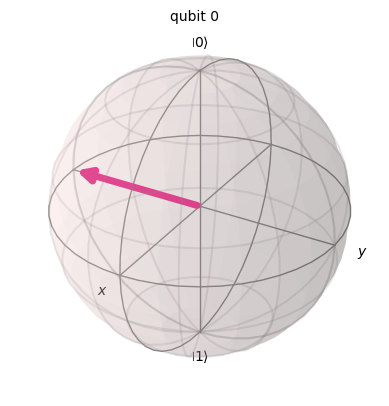

In [9]:
def lab1_ex4():
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.sdg(0)
    return qc
state = Statevector.from_instruction(lab1_ex4())
plot_bloch_multivector(state)

<h3> Task 8 </h3>

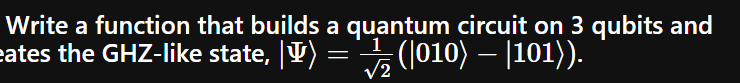

C:\Users\LENOVO\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


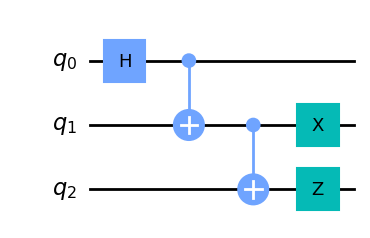

In [10]:

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.x(1)
qc.z(2)
qc.draw(output='mpl')